<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Network%20in%20Tensorflow/CNN_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 1**

## Import The Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
from pathlib import Path

## Get The Data

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-28 00:01:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  87.8MB/s    in 1.2s    

2024-08-28 00:01:48 (87.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print(f"There {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There 2 directories and 0 images in pizza_steak
There 2 directories and 0 images in pizza_steak/train
There 0 directories and 750 images in pizza_steak/train/pizza
There 0 directories and 750 images in pizza_steak/train/steak
There 2 directories and 0 images in pizza_steak/test
There 0 directories and 250 images in pizza_steak/test/pizza
There 0 directories and 250 images in pizza_steak/test/steak


## Get The Class Names

In [5]:
current_directory = Path().absolute()
data_directory = current_directory/"pizza_steak/train"

In [6]:
class_names = np.array(sorted([item.name for item in data_directory.glob("*")]))
print(class_names)

['pizza' 'steak']


## Visualize The Random Image

In [7]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # mpimg.imread() doesn't read PosixPath
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image Shape {img.shape}")
  return img

['532970.jpg']
Image Shape (512, 512, 3)


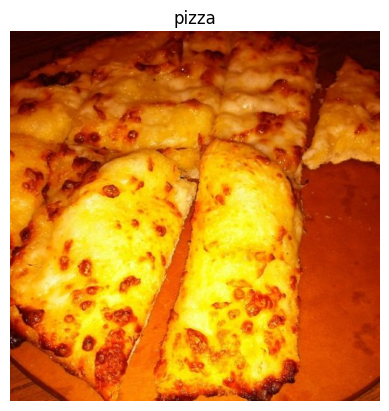

In [8]:
# View Random Image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

## Get The Train and Test Data

In [9]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

## Augmented Data

In [12]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator instance without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data from directory and augment it
print("Augmented Training Data : ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

print("Non-Augmented Training Data : ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               )